In [4]:
!pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 4.8 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.1 MB 7.0 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 7.0 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 7.2 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.1 MB 6.9 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 6.9 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 6.1 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.1 MB 5.7 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 5.5 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 5.1 MB/s eta 0:00:00
   --------

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('iris1.csv')

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
# e. Data Cleaning
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)  # Remove any NA (unlikely in Iris)
df = df[(df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']] >= 0).all(axis=1)]  # Remove negative values (unlikely)

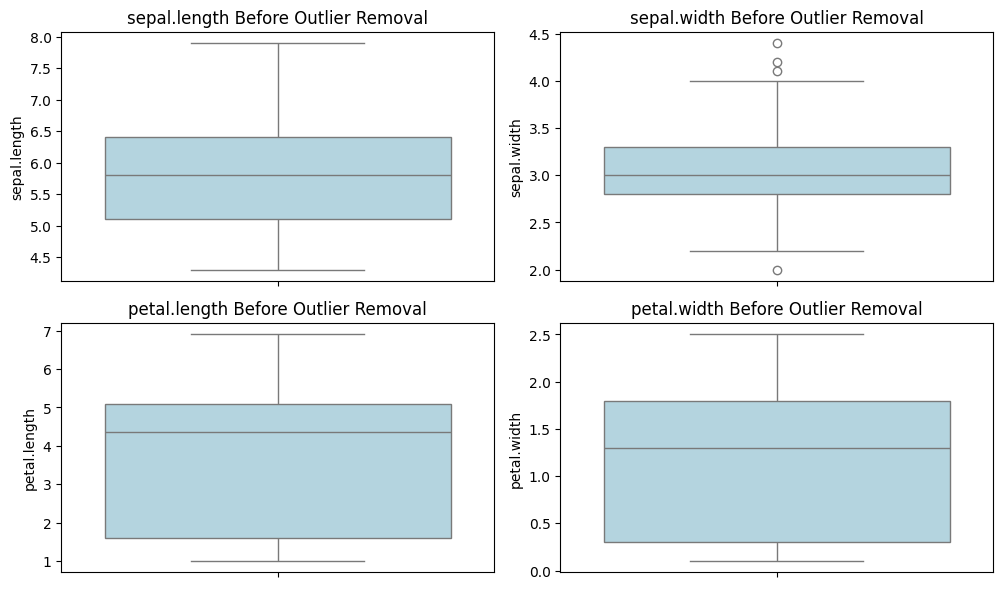

In [6]:
# f. Error Correcting: Outlier Detection and Removal using IQR
# Plot box plots before outlier removal
plt.figure(figsize=(10, 6))
for i, col in enumerate(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"{col} Before Outlier Removal")
plt.tight_layout()
plt.show()

In [7]:
# Remove outliers using IQR
for col in ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

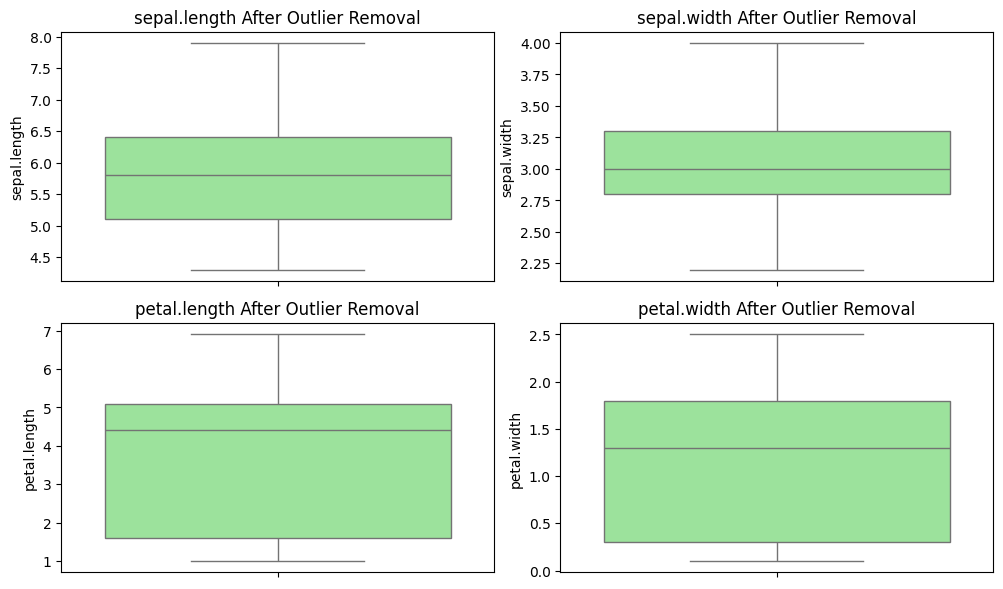

In [8]:
# Plot box plots after outlier removal
plt.figure(figsize=(10, 6))
for i, col in enumerate(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"{col} After Outlier Removal")
plt.tight_layout()
plt.show()

In [9]:
# g. Data Transformation (Standardization)
scaler = StandardScaler()
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
df[features] = scaler.fit_transform(df[features])

In [10]:
# h. Build Models & Compare

# X = input features (measurements: sepal.length, sepal.width, petal.length, petal.width)
# y = output target (flower type: Setosa, Versicolor, Virginica)
X = df[features]  # Select feature columns
y = df['variety']  # Select target column
# Split data: 80% for training (X_train, y_train), 20% for testing (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)  # Train model on X_train, y_train
lr_pred = lr_model.predict(X_test)  # Predict on X_test

In [12]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)  # Train model on X_train, y_train
nb_pred = nb_model.predict(X_test)  # Predict on X_test

In [13]:
# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Logistic Regression Accuracy: 0.9333333333333333
Naive Bayes Accuracy: 0.9333333333333333
